In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import kerastuner as kt

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


C:\Users\ASUS\AppData\Local\Temp\ipykernel_24080\2595359535.py:7: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [2]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df=df.drop(columns='Unnamed: 32')

In [7]:
len(df.columns)

32

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df.duplicated().any()

False

In [10]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df['diagnosis']=l.fit_transform(df['diagnosis'])

In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
s=SMOTE(random_state=42)

In [14]:
X,y=s.fit_resample(df.drop(columns='diagnosis'),df['diagnosis'])

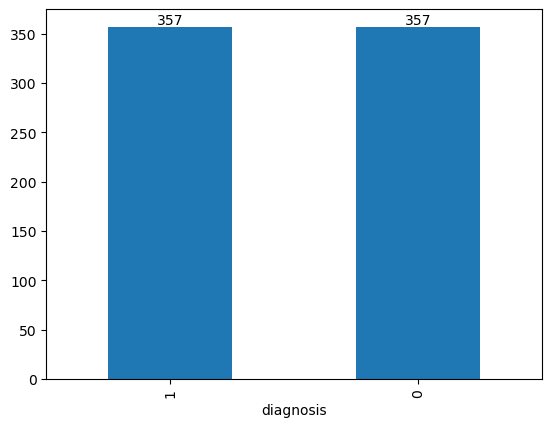

In [15]:
ax=y.value_counts().plot(kind='bar')
for bars in ax.containers:
    ax.bar_label(bars)

In [16]:
X.drop(columns='id',inplace=True)

In [17]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,...,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900
1,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,...,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020
2,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,...,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580
3,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,...,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000
4,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,...,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,14.176003,17.831422,93.814926,624.140054,0.109765,0.151216,0.125806,0.063291,0.198258,0.063808,...,16.829629,23.285969,112.623354,876.824205,0.151098,0.350469,0.358662,0.151224,0.309456,0.082407
710,15.640118,19.525144,103.076417,778.249738,0.109212,0.145941,0.136084,0.082802,0.203038,0.065565,...,18.918377,26.151081,123.610648,1104.895739,0.141056,0.304224,0.316666,0.141221,0.339597,0.091793
711,22.599174,24.026193,149.073831,1615.206306,0.105543,0.129105,0.220404,0.132053,0.184116,0.055929,...,28.404436,30.663298,188.507611,2539.599730,0.145428,0.261728,0.459129,0.202828,0.258909,0.077067
712,15.021883,19.512373,98.277079,709.296841,0.105160,0.109476,0.127603,0.070836,0.185913,0.057690,...,18.983749,26.835227,123.108685,1120.950665,0.151471,0.221098,0.354345,0.143760,0.284714,0.078791


<Axes: >

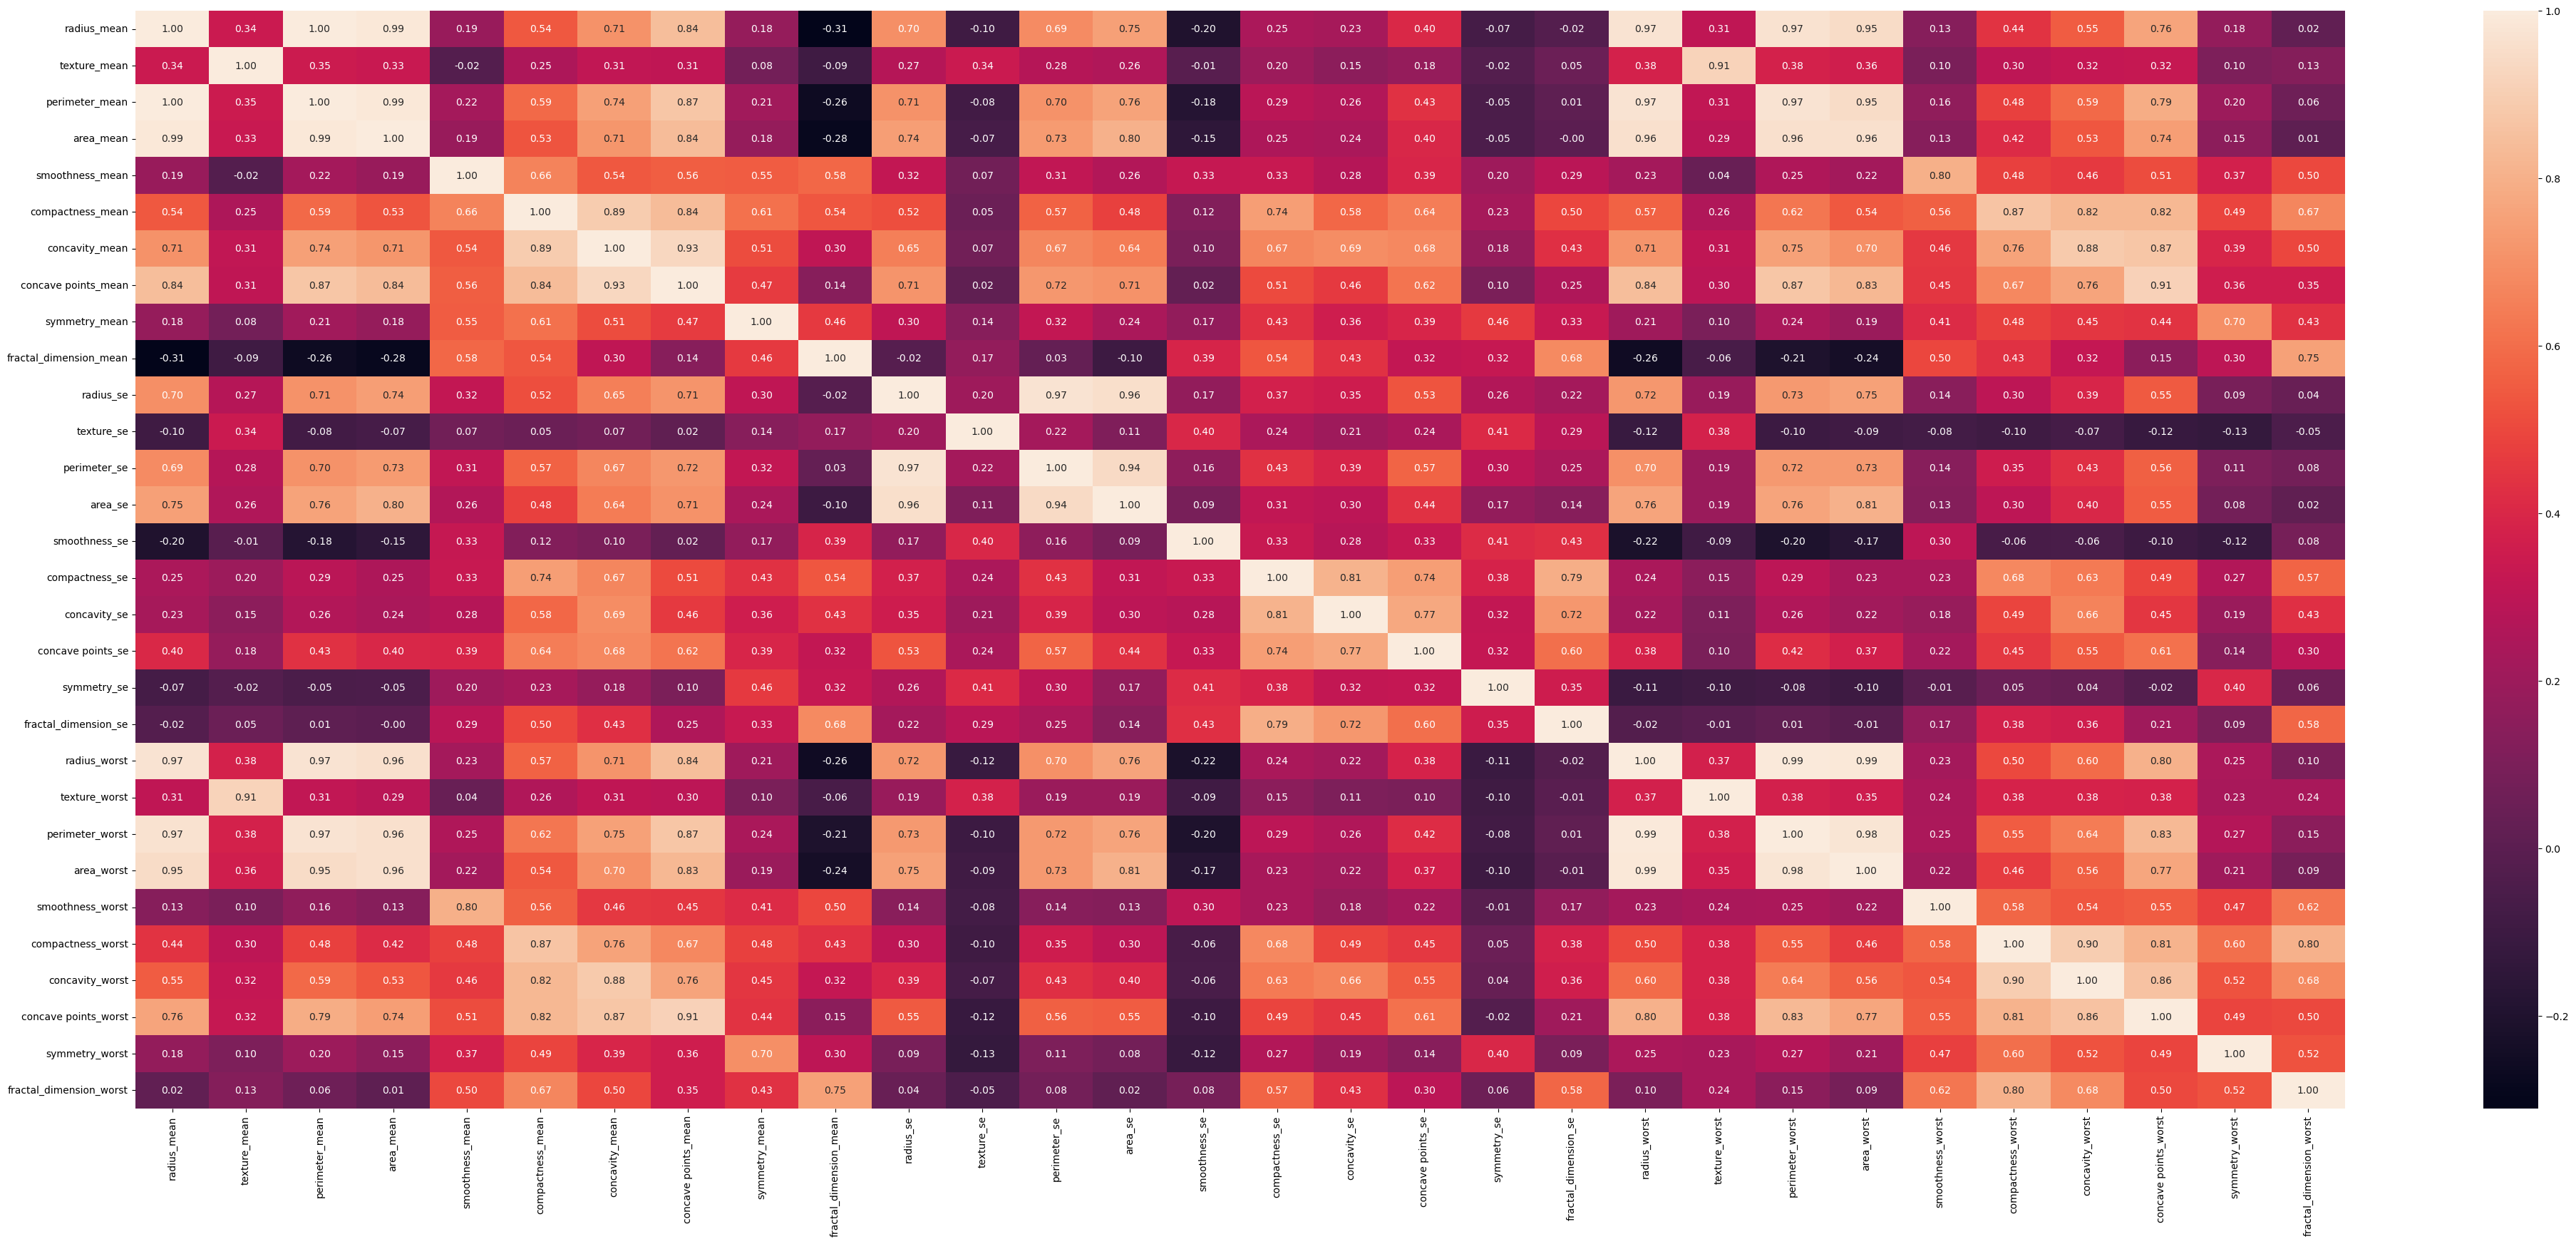

In [18]:
plt.figure(figsize=(50,20))
sns.heatmap(X.corr(),annot=True,fmt='0.2f')

In [19]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector

In [20]:
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

In [21]:
from tensorflow.keras.models import Sequential

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [25]:
st=StandardScaler()
X_train=st.fit_transform(X_train)
X_test=st.transform(X_test)

In [26]:
model=Sequential()
model.add(Dense(60,activation='relu',input_dim=30))
model.add(Dropout(0.6))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                1860      
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 batch_normalization (Batch  (None, 60)                240       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 2161 (8.44 KB)
Trainable params: 2041 (7.97 KB)
Non-trainable params: 120 (480.00 Byte)
_________________________________________________________________


In [28]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
callbacks=EarlyStopping(monitor='val_loss',patience=20,verbose=1)

In [36]:
def build_model(hp):
    model=Sequential()
    c=0
    for i in range(hp.Int('num_layers',min_value=1,max_value=21)):
        if c==0:
            model.add(Dense(hp.Int('num_nodes'+str(i),min_value=30,max_value=150,step=6),activation=hp.Choice('activation'+str(i),['relu','tanh','sigmoid']),input_dim=30))
            model.add(Dropout(hp.Choice('dropout'+str(i),[0.2,0.5,0.8])))
            model.add(BatchNormalization())
        else:
            model.add(Dense(hp.Int('num_nodes'+str(i),min_value=30,max_value=150,step=6),activation=hp.Choice('activation'+str(i),['relu','tanh','sigmoid']),callbacks=callbacks))
            model.add(Dropout(hp.Choice('dropout'+str(i),[0.2,0.5,0.8])))
            model.add(BatchNormalization())
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=hp.Choice('opt',['adam','rmsprop','sgd','adadelta']),metrics=['accuracy'])
    return model

In [37]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='BC_file',project_name='DL')

In [39]:
tuner.search(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Trial 5 Complete [00h 00m 16s]
val_accuracy: 0.5174825191497803

Best val_accuracy So Far: 0.5174825191497803
Total elapsed time: 00h 01m 21s


In [40]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 17,
 'num_nodes0': 120,
 'activation0': 'relu',
 'dropout0': 0.5,
 'opt': 'adam',
 'num_nodes1': 36,
 'activation1': 'relu',
 'dropout1': 0.5,
 'num_nodes2': 72,
 'activation2': 'relu',
 'dropout2': 0.5,
 'num_nodes3': 36,
 'activation3': 'sigmoid',
 'dropout3': 0.5,
 'num_nodes4': 30,
 'activation4': 'sigmoid',
 'dropout4': 0.5,
 'num_nodes5': 78,
 'activation5': 'sigmoid',
 'dropout5': 0.8,
 'num_nodes6': 30,
 'activation6': 'relu',
 'dropout6': 0.2,
 'num_nodes7': 30,
 'activation7': 'relu',
 'dropout7': 0.2,
 'num_nodes8': 30,
 'activation8': 'relu',
 'dropout8': 0.2,
 'num_nodes9': 30,
 'activation9': 'relu',
 'dropout9': 0.2,
 'num_nodes10': 30,
 'activation10': 'relu',
 'dropout10': 0.2,
 'num_nodes11': 30,
 'activation11': 'relu',
 'dropout11': 0.2,
 'num_nodes12': 30,
 'activation12': 'relu',
 'dropout12': 0.2,
 'num_nodes13': 30,
 'activation13': 'relu',
 'dropout13': 0.2,
 'num_nodes14': 30,
 'activation14': 'relu',
 'dropout14': 0.2,
 'num_nodes15': 30,
 'act

In [41]:
final_model=tuner.get_best_models(num_models=1)[0]

In [42]:
final_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               3720      
                                                                 
 dropout (Dropout)           (None, 120)               0         
                                                                 
 batch_normalization (Batch  (None, 120)               480       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 36)                4356      
                                                                 
 dropout_1 (Dropout)         (None, 36)                0         
                                                                 
 batch_normalization_1 (Bat  (None, 36)                144       
 chNormalization)                                       

In [44]:
X_new=np.vstack((X_train,X_test))
X_new.shape

(714, 30)

In [45]:
y_new=np.concatenate((y_train,y_test),axis=0)
y_new.shape

(714,)

In [53]:
history=final_model.fit(X_new,y_new,validation_split=0.1,epochs=1000,initial_epoch=11)

Epoch 12/1000
21/21 [==============================] - 1s 25ms/step - loss: 0.6923 - accuracy: 0.5249 - val_loss: 0.6945 - val_accuracy: 0.4028
Epoch 13/1000
21/21 [==============================] - 0s 19ms/step - loss: 0.6990 - accuracy: 0.4891 - val_loss: 0.6941 - val_accuracy: 0.5278
Epoch 14/1000
21/21 [==============================] - 0s 20ms/step - loss: 0.6992 - accuracy: 0.4969 - val_loss: 0.6940 - val_accuracy: 0.5139
Epoch 15/1000
21/21 [==============================] - 0s 15ms/step - loss: 0.6952 - accuracy: 0.5156 - val_loss: 0.6933 - val_accuracy: 0.5278
Epoch 16/1000
21/21 [==============================] - 0s 16ms/step - loss: 0.6910 - accuracy: 0.5452 - val_loss: 0.6933 - val_accuracy: 0.5278
Epoch 17/1000
21/21 [==============================] - 0s 15ms/step - loss: 0.6936 - accuracy: 0.5125 - val_loss: 0.6941 - val_accuracy: 0.5278
Epoch 18/1000
21/21 [==============================] - 0s 14ms/step - loss: 0.7012 - accuracy: 0.4875 - val_loss: 0.6943 - val_accuracy:

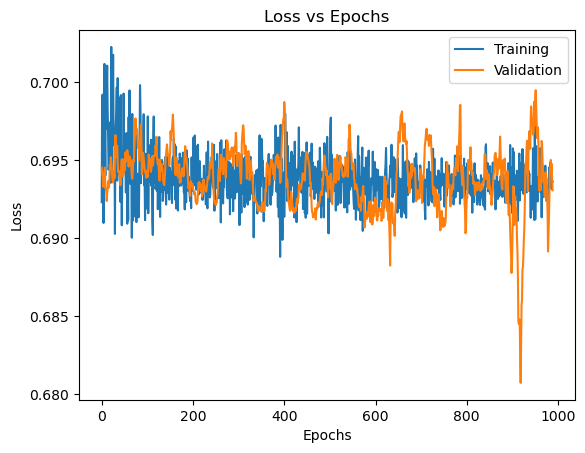

In [54]:
plt.plot(history.history['loss'],label='Training')
plt.plot(history.history['val_loss'],label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend(bbox_to_anchor=(1,1))

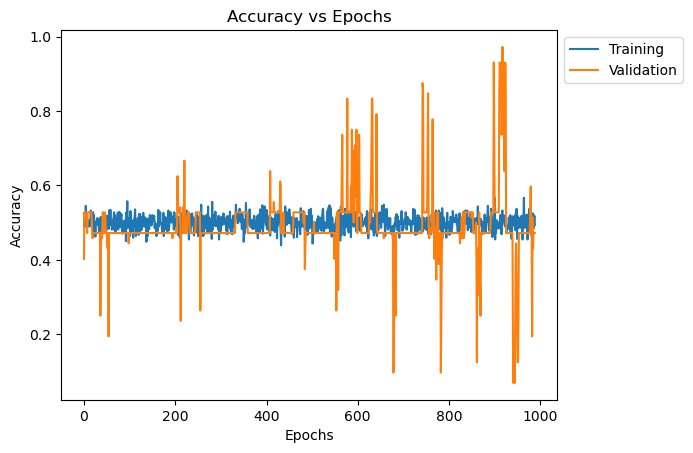

In [55]:
plt.plot(history.history['accuracy'],label='Training')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend(bbox_to_anchor=(1,1))

In [49]:
m=Sequential()
m.add(Dense(128,input_dim=30,activation='relu'))
m.add(Dense(1,activation='sigmoid'))

m.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
m.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               3968      
                                                                 
 dense_19 (Dense)            (None, 1)                 129       
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
history=m.fit(X_new,y_new,validation_split=0.2,epochs=1000)

Epoch 1/1000
18/18 [==============================] - 1s 21ms/step - loss: 0.4409 - accuracy: 0.8354 - val_loss: 0.2447 - val_accuracy: 0.9510
Epoch 2/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.2003 - accuracy: 0.9527 - val_loss: 0.1578 - val_accuracy: 0.9720
Epoch 3/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.1410 - accuracy: 0.9632 - val_loss: 0.1259 - val_accuracy: 0.9930
Epoch 4/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.1152 - accuracy: 0.9737 - val_loss: 0.1068 - val_accuracy: 0.9930
Epoch 5/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.0997 - accuracy: 0.9737 - val_loss: 0.0938 - val_accuracy: 0.9930
Epoch 6/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.0893 - accuracy: 0.9737 - val_loss: 0.0850 - val_accuracy: 0.9930
Epoch 7/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.0816 - accuracy: 0.9772 - val_loss: 0.0765 - val_accuracy: 0.9930
Epoch

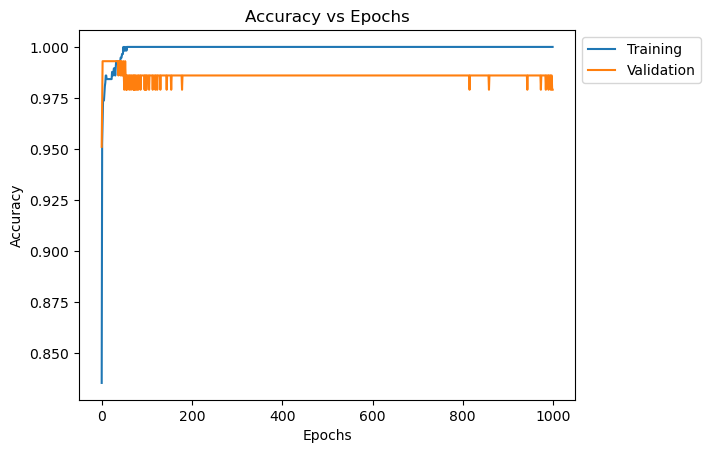

In [51]:
plt.plot(history.history['accuracy'],label='Training')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend(bbox_to_anchor=(1,1))

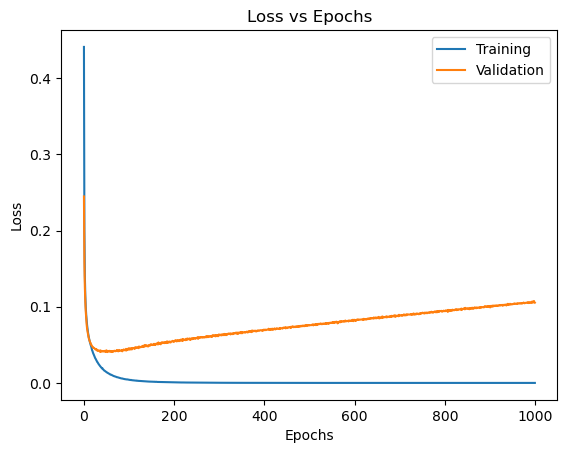

In [52]:
plt.plot(history.history['loss'],label='Training')
plt.plot(history.history['val_loss'],label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend(bbox_to_anchor=(1,1))